In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

In [2]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_median.csv')

In [3]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [8]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [9]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/1000
45/45 [==============================] - 2s 17ms/step - loss: 61.6115 - val_loss: 38.8843
Epoch 2/1000
45/45 [==============================] - 1s 11ms/step - loss: 34.8089 - val_loss: 27.3471
Epoch 3/1000
45/45 [==============================] - 0s 11ms/step - loss: 22.3604 - val_loss: 15.7401
Epoch 4/1000
45/45 [==============================] - 1s 11ms/step - loss: 12.8188 - val_loss: 10.1598
Epoch 5/1000
45/45 [==============================] - 1s 12ms/step - loss: 7.3139 - val_loss: 7.9867
Epoch 6/1000
45/45 [==============================] - 1s 11ms/step - loss: 7.1882 - val_loss: 6.4286
Epoch 7/1000
45/45 [==============================] - 1s 12ms/step - loss: 5.1188 - val_loss: 5.9070
Epoch 8/1000
45/45 [==============================] - 0s 11ms/step - loss: 4.4089 - val_loss: 3.3726
Epoch 9/1000
45/45 [==============================] - 1s 12ms/step - loss: 3.6963 - val_loss: 2.7568
Epoch 10/1000
45/45 [==============================] - 0s 11ms/step - loss: 2.6839 

In [10]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean squared error:', mae)

12/12 [==============================] - 0s 3ms/step - loss: 0.6327
Mean squared error: 0.6326742768287659


In [11]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 260ms/step
Predicted WQI: 71.96182


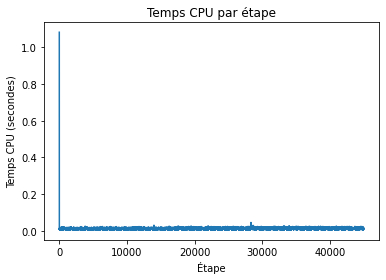

In [12]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le **moyenne**

In [13]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean.csv')

In [14]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [18]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [19]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [21]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/1000
45/45 [==============================] - 0s 6ms/step - loss: 26.8024 - val_loss: 25.3752
Epoch 2/1000
45/45 [==============================] - 0s 8ms/step - loss: 26.5920 - val_loss: 25.7838
Epoch 3/1000
45/45 [==============================] - 0s 8ms/step - loss: 26.7963 - val_loss: 25.5898
Epoch 4/1000
45/45 [==============================] - 0s 7ms/step - loss: 26.7383 - val_loss: 25.4688
Epoch 5/1000
45/45 [==============================] - 0s 7ms/step - loss: 26.6189 - val_loss: 25.2910
Epoch 6/1000
45/45 [==============================] - 0s 7ms/step - loss: 26.2832 - val_loss: 25.5144
Epoch 7/1000
45/45 [==============================] - 0s 7ms/step - loss: 26.2142 - val_loss: 25.0093
Epoch 8/1000
45/45 [==============================] - 0s 7ms/step - loss: 26.2200 - val_loss: 25.0376
Epoch 9/1000
45/45 [==============================] - 0s 7ms/step - loss: 25.9585 - val_loss: 24.8218
Epoch 10/1000
45/45 [==============================] - 0s 8ms/step - loss: 25.7509

In [22]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute error:', mae)

12/12 [==============================] - 0s 3ms/step - loss: 3.8181
Mean absolute error: 3.8181192874908447


In [23]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 145ms/step
Predicted WQI: 76.668976


# remplacer les valeurs manquantes par le plus **frequent**

In [24]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_most_frequent.csv')

In [25]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [29]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [30]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [31]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/1000
45/45 [==============================] - 2s 13ms/step - loss: 67.8611 - val_loss: 43.5648
Epoch 2/1000
45/45 [==============================] - 0s 8ms/step - loss: 37.1213 - val_loss: 33.5127
Epoch 3/1000
45/45 [==============================] - 0s 7ms/step - loss: 28.9707 - val_loss: 23.9183
Epoch 4/1000
45/45 [==============================] - 0s 8ms/step - loss: 21.5589 - val_loss: 18.5480
Epoch 5/1000
45/45 [==============================] - 0s 8ms/step - loss: 16.6695 - val_loss: 13.3461
Epoch 6/1000
45/45 [==============================] - 0s 7ms/step - loss: 13.4447 - val_loss: 10.6939
Epoch 7/1000
45/45 [==============================] - 0s 9ms/step - loss: 8.7911 - val_loss: 7.9938
Epoch 8/1000
45/45 [==============================] - 0s 7ms/step - loss: 5.5097 - val_loss: 4.7096
Epoch 9/1000
45/45 [==============================] - 0s 8ms/step - loss: 3.4551 - val_loss: 3.5735
Epoch 10/1000
45/45 [==============================] - 0s 7ms/step - loss: 2.6358 - val

In [32]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute error:', mae)

12/12 [==============================] - 0s 3ms/step - loss: 0.7339
Mean absolute error: 0.7339156866073608


In [33]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 144ms/step
Predicted WQI: 72.31733


# remplacer les valeurs manquantes par **le moyenne de chaque state**

In [34]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean_state.csv')

In [35]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [39]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [40]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [42]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])

Epoch 1/1000
42/42 [==============================] - 1s 12ms/step - loss: 76.5342 - val_loss: 40.0816
Epoch 2/1000
42/42 [==============================] - 0s 8ms/step - loss: 38.8278 - val_loss: 35.3930
Epoch 3/1000
42/42 [==============================] - 0s 10ms/step - loss: 33.2216 - val_loss: 29.5642
Epoch 4/1000
42/42 [==============================] - 0s 11ms/step - loss: 26.4825 - val_loss: 23.1746
Epoch 5/1000
42/42 [==============================] - 0s 10ms/step - loss: 21.1240 - val_loss: 18.2649
Epoch 6/1000
42/42 [==============================] - 0s 10ms/step - loss: 18.3194 - val_loss: 17.4653
Epoch 7/1000
42/42 [==============================] - 0s 10ms/step - loss: 16.6248 - val_loss: 14.7097
Epoch 8/1000
42/42 [==============================] - 0s 11ms/step - loss: 14.2203 - val_loss: 12.6461
Epoch 9/1000
42/42 [==============================] - 0s 11ms/step - loss: 12.5999 - val_loss: 10.9486
Epoch 10/1000
42/42 [==============================] - 0s 8ms/step - loss:

In [43]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('mean_absolute_percentage_error:', mae)

11/11 [==============================] - 0s 3ms/step - loss: 0.5426
mean_absolute_percentage_error: 0.5425916910171509


In [44]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 215ms/step
Predicted WQI: 72.30016
